#Food Restaurant Reviews Sentiment Analysis


Purpose :- The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression, Random Forest and LSVM (Linier Support Vector Machine ). In the end, we hope to find a "best" model for predicting the review's sentiment



1.) Uploading Restaurant Data Set

In [ ]:
import numpy as np
import pandas as pd

from google.colab import files
uploaded= files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews (1).tsv


In [ ]:
dataset = pd.read_csv("Restaurant_Reviews.tsv",delimiter ="\t")

In [ ]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


if Liked is 0 it means Negative Comment else It's a Positive Comment

Adding Analysis Column

In [ ]:
analysis = lambda Liked: 'Positive' if Liked == 1 else 'Negative'

def analysis_based_on_polarity(df):
  dataset['Analysis'] = df['Liked'].apply(analysis)
  return df

dataset = analysis_based_on_polarity(dataset)


print(dataset)

                                                Review  Liked  Analysis
0                             Wow... Loved this place.      1  Positive
1                                   Crust is not good.      0  Negative
2            Not tasty and the texture was just nasty.      0  Negative
3    Stopped by during the late May bank holiday of...      1  Positive
4    The selection on the menu was great and so wer...      1  Positive
..                                                 ...    ...       ...
995  I think food should have flavor and texture an...      0  Negative
996                           Appetite instantly gone.      0  Negative
997  Overall I was not impressed and would not go b...      0  Negative
998  The whole experience was underwhelming, and I ...      0  Negative
999  Then, as if I hadn't wasted enough of my life ...      0  Negative

[1000 rows x 3 columns]


#Preprocessing Dataset

Data Cleaning :- I wish to remove any emojis or other unwanted text present in our Review Column

In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

dataset["Review"] = dataset["Review"].apply(deEmojify)
dataset

,Review,Liked,Analysis
0,Wow... Loved this place.,1,Positive
1,Crust is not good.,0,Negative
2,Not tasty and the texture was just nasty.,0,Negative
3,Stopped by during the late May bank holiday of...,1,Positive
4,The selection on the menu was great and so wer...,1,Positive
...,...,...,...
995,I think food should have flavor and texture an...,0,Negative
996,Appetite instantly gone.,0,Negative
997,Overall I was not impressed and would not go b...,0,Negative
998,"The whole experience was underwhelming, and I ...",0,Negative


Our Dataset now undergoes following steps

1.   Converting to Lowercase
2.   Tokenization
3.   Stemming
4.   Lemmetization
   



In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
corpus = []

lemmatizer = WordNetLemmatizer()

for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])

    # Converting to Lower Case
    review = review.lower()

    # Tokenization
    review = review.split()

    # Stemming (Creating Porter Stemmer object to take the stem )
    ps = PorterStemmer()

    # Stemming for each word
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

    # Lemmetization
    a=[]
    for i in review:
      a.append(lemmatizer.lemmatize(i))

    review=a
    # Rejoin all string array elements to create back into a string
    review = ' '.join(review)

    # Append each string of preprocessed text to the corpus
    corpus.append(review)

corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care le interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid

#Visualization of Data

In [ ]:
# Plotting a Bar Graph

Total Positive : 500
Total Negative : 500


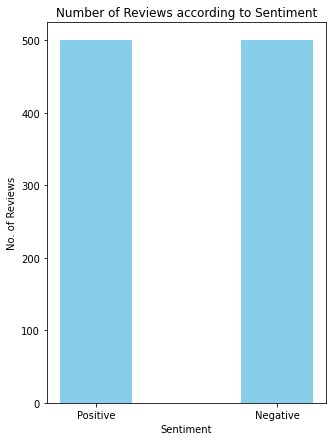

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tot_count(df,tot_pos,tot_neg):
  tot_pos=0
  tot_neg=0

  for i in df['Analysis']:
    if(i == 'Positive'):
       tot_pos+=1
    elif (i=="Negative"):
      tot_neg+=1
  return [tot_pos,tot_neg]

a = tot_count(dataset,0,0)

print("Total Positive : "+ str(a[0]))
print("Total Negative : "+str(a[1]))

# creating the dataset
data = {'Positive':a[0], 'Negative':a[1]}

Sentiments = list(data.keys())
Number = list(data.values())

fig = plt.figure(figsize = (5, 7))

# creating the bar plot
plt.bar(Sentiments, Number, color ='skyblue',
		width = 0.4)

plt.xlabel("Sentiment")
plt.ylabel("No. of Reviews")
plt.title("Number of Reviews according to Sentiment")
plt.show()

Generating Word Cloud

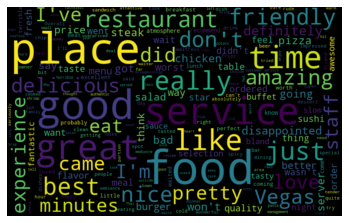

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
from wordcloud import WordCloud

def generate_word_clouds(df):
  allWords = ' '.join([twts for twts in df['Review']])
  wordCloud = WordCloud(stopwords = text.ENGLISH_STOP_WORDS ,width=800, height=500, random_state=21, max_font_size=110).generate(allWords)
  plt.imshow(wordCloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()
generate_word_clouds(dataset)

#Vectorization

From the cleaned dataset, potential features are extracted and are converted to numerical format. The vectorization techniques are used to convert textual data to numerical format. Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.




In [ ]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

#Training and Classification

Further the data is splitted into training and testing set using Cross Validation technique. This data is used as input to classification algorithm (Classifiers).



Classification Algorithms:

Algorithms like Decision tree, Support Vector Machine, Logistic Regression, Naive Bayes were implemented and on comparing the evaluation metrics two of the algorithms gave better predictions than others.

Multinomial Naive Bayes
Bernoulli Naive Bayes
Logistic Regression

In [ ]:
# Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) #70% training and 30% testing

1) Multinomial Naive Bayes Classifier (MNB)




Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

In [ ]:
# Multinomial NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

MNB_score1 = accuracy_score(y_test,y_pred)
MNB_score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)

print("\n")
print("Accuracy is ",round(MNB_score1*100,2),"%")
print("Precision is ",round(MNB_score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[117  35]
 [ 34 114]]


Accuracy is  77.0 %
Precision is  0.77
Recall is  0.77


2) Bernoulli Naive bayes

It works in binary classification. Bernoulli Naive Bayes classifier can be used to detect whether a person has a disease or not based on the data given. This would be a binary classification problem so that Bernoulli Naive Bayes would work well in this case

In [ ]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

BNB_score1 = accuracy_score(y_test,y_pred)
BNB_score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(BNB_score1*100,2),"%")
print("Precision is ",round(BNB_score2,2))
print("Recall is ",round(score3,2))


Confusion Matrix:
 [[115  37]
 [ 32 116]]


Accuracy is  77.0 %
Precision is  0.76
Recall is  0.78


3) Logistic regression

It is used to calculate or predict the probability of a binary (yes/no) event occurring. An example of logistic regression could be applying machine learning to determine if a person is likely to be infected with COVID-19 or not.

In [ ]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

LR_score1 = accuracy_score(y_test,y_pred)
LR_score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(LR_score1*100,2),"%")
print("Precision is ",round(LR_score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[124  28]
 [ 44 104]]


Accuracy is  76.0 %
Precision is  0.79
Recall is  0.7


4) Random Forest Classifier

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python

In [ ]:
# Random Forest Classifier

# Fitting RFC to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier =  RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
RFC_score1 = accuracy_score(y_test,y_pred)
RFC_score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(RFC_score1*100,2),"%")
print("Precision is ",round(RFC_score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[132  20]
 [ 62  86]]


Accuracy is  72.67 %
Precision is  0.81
Recall is  0.58


5.) LSVM (Linier Support Vector Machine )

Linier Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.

In [ ]:
# Fitting LSVM to the Training set

#Import svm model
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
LSVM_score1 = accuracy_score(y_test,y_pred)
LSVM_score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(LSVM_score1*100,2),"%")
print("Precision is ",round(LSVM_score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[120  32]
 [ 43 105]]


Accuracy is  75.0 %
Precision is  0.77
Recall is  0.71


#Analysis of Models

According to Accuracy

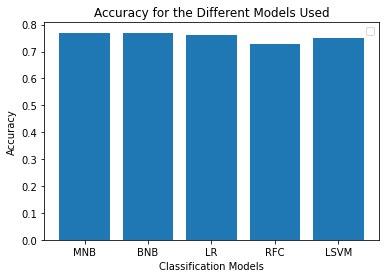

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

#Data I got from the Models
Accuracy = [MNB_score1,BNB_score1,LR_score1,RFC_score1,LSVM_score1]
Precision = [MNB_score2,BNB_score2,LR_score2,RFC_score2,LSVM_score2]

# Pass the x and y cordinates of the bars to the
# function. The label argument gives a label to the data.
plt.bar(["MNB","BNB","LR","RFC","LSVM"],
Accuracy, align='center')
plt.legend()

plt.ylabel('Accuracy')
plt.xlabel('Classification Models')
plt.title('Accuracy for the Different Models Used')

plt.show()


According to Precision

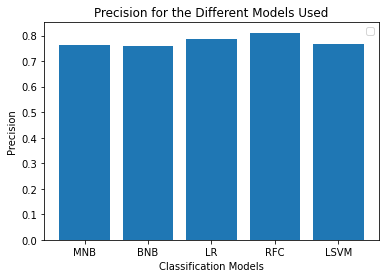

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

#Data I got from the Models
Accuracy = [MNB_score1,BNB_score1,LR_score1,RFC_score1,LSVM_score1]
Precision = [MNB_score2,BNB_score2,LR_score2,RFC_score2,LSVM_score2]

# Pass the x and y cordinates of the bars to the
# function. The label argument gives a label to the data.
plt.bar(["MNB","BNB","LR","RFC","LSVM"],
Precision, align='center')
plt.legend()

plt.ylabel('Precision')
plt.xlabel('Classification Models')
plt.title('Precision for the Different Models Used')

plt.show()


#Final Result

Analysis and Conclusion
In this study, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques.Algorithms namely Multinomial Naive Bayes and Bernoulli Naive Bayes, RainForest Classifier, Linier Regression and LSVM are implemented.

Evaluation metrics used here are accuracy, precision and recall.

According to Accuracy the Best Model is 💯

⏩MNB & BNB (Multinomial Bayes Classifier) - 77 %

According to Precision the Best Model is:

⏩RFC (Random Forest Classifier) - 0.81

#Thank You !!